![tower_bridge](tower_bridge.jpg)

As the climate changes, predicting the weather becomes ever more important for businesses. You have been asked to support on a machine learning project with the aim of building a pipeline to predict the climate in London, England. Specifically, the model should predict mean temperature in degrees Celsius (°C).

Since the weather depends on a lot of different factors, you will want to run a lot of experiments to determine what the best approach is to predict the weather. In this project, you will run experiments for different regression models predicting the mean temperature, using a combination of `sklearn` and `mlflow`.

You will be working with data stored in `london_weather.csv`, which contains the following columns:
- **date** - recorded date of measurement - (**int**)
- **cloud_cover** - cloud cover measurement in oktas - (**float**)
- **sunshine** - sunshine measurement in hours (hrs) - (**float**)
- **global_radiation** - irradiance measurement in Watt per square meter (W/m2) - (**float**)
- **max_temp** - maximum temperature recorded in degrees Celsius (°C) - (**float**)
- **mean_temp** - **target** mean temperature in degrees Celsius (°C) - (**float**)
- **min_temp** - minimum temperature recorded in degrees Celsius (°C) - (**float**)
- **precipitation** - precipitation measurement in millimeters (mm) - (**float**)
- **pressure** - pressure measurement in Pascals (Pa) - (**float**)
- **snow_depth** - snow depth measurement in centimeters (cm) - (**float**)

In [14]:
# Run this cell to install mlflow
!pip install mlflow

Defaulting to user installation because normal site-packages is not writeable


In [15]:
# Run this cell to import the modules you require
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm



# Start coding here
# Use as many cells as you like

In [16]:
# Read in the data
weather = pd.read_csv("london_weather.csv")

print(weather.head())
print(weather.info())

       date  cloud_cover  sunshine  ...  precipitation  pressure  snow_depth
0  19790101          2.0       7.0  ...            0.4  101900.0         9.0
1  19790102          6.0       1.7  ...            0.0  102530.0         8.0
2  19790103          5.0       0.0  ...            0.0  102050.0         4.0
3  19790104          8.0       0.0  ...            0.0  100840.0         2.0
4  19790105          6.0       2.0  ...            0.0  102250.0         1.0

[5 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 n

In [17]:
# Convert the 'date' column from integer to datetime
weather['date'] = pd.to_datetime(weather['date'], format='%Y%m%d', errors='coerce')

# Display the minimum and maximum dates
min_date = weather['date'].min()
max_date = weather['date'].max()

print(f"Minimum date: {min_date}")
print(f"Maximum date: {max_date}")

# Drop the date column
weather = weather.drop('date', axis = 1)

Minimum date: 1979-01-01 00:00:00
Maximum date: 2020-12-31 00:00:00


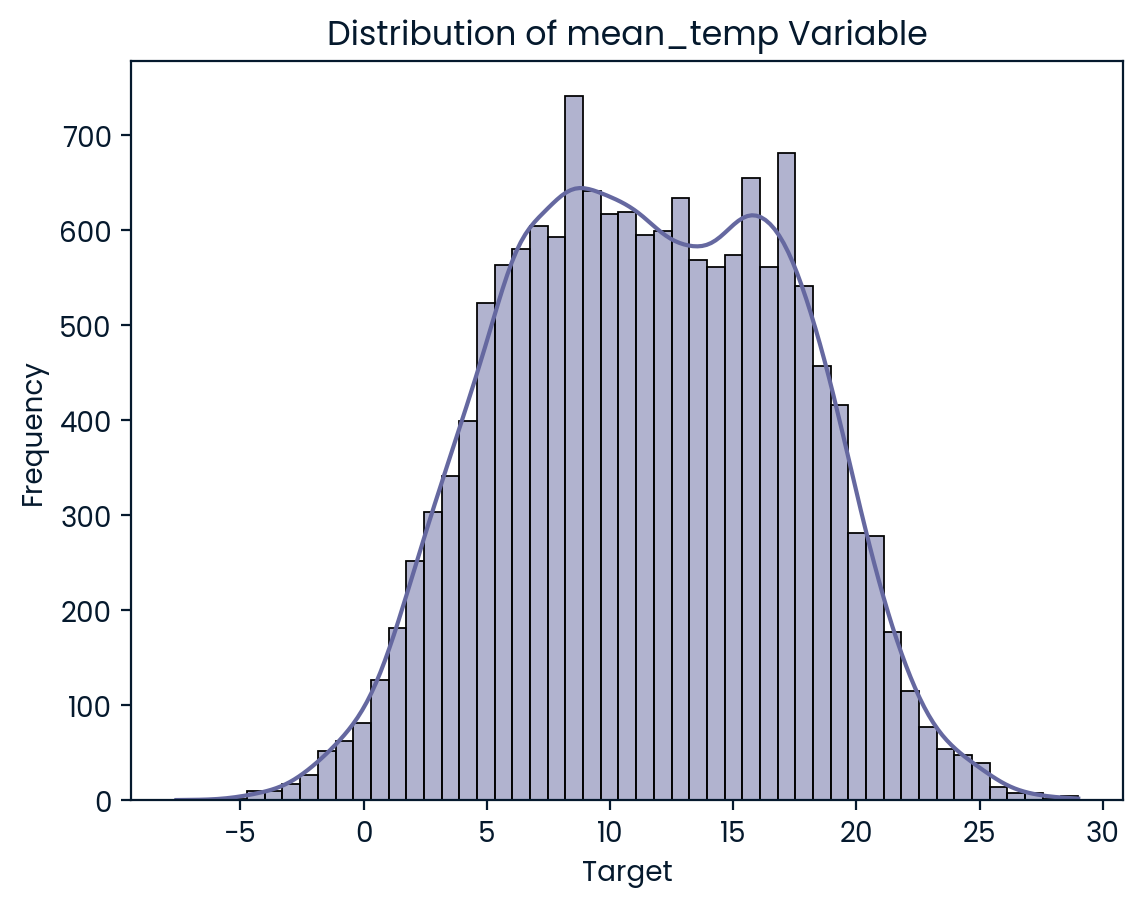

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(weather['mean_temp'], kde=True)
plt.title("Distribution of mean_temp Variable")
plt.xlabel("Target")
plt.ylabel("Frequency")
plt.show()

In [19]:
### LINEAR REGRESSION

# 1. Remove rows with any null values
weather2 = weather.dropna()
weather2 = weather2.reset_index(drop=True)  # Reset the index


# 2. Normalize the entire dataframe (excluding the target variable)
scaler = StandardScaler()
weather2 = weather2.drop(['snow_depth'], axis = 1)
features = weather2.drop('mean_temp', axis=1)  
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Add the target back to the normalized dataframe
weather_normalized = pd.concat([normalized_features, weather2['mean_temp']], axis=1)


# 3. Split into train and test sets (70% train, 30% test)
X = weather_normalized.drop('mean_temp', axis=1)  # Features
y = weather_normalized['mean_temp']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)


# 4. Implement Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model coefficients and intercept
print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)


# 5. Check model statistics using statsmodels
X_train_sm = sm.add_constant(X_train)  # Add a constant (intercept) to the model
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())  # Summary statistics for the regression model


# 6. Predict on the test set
X_test_sm = sm.add_constant(X_test)  # Add constant to test data
y_pred = lr_model.predict(X_test)


# 7. Calculate the RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE on test set:", rmse)


Coefficients: [-0.12599499  0.21613133  0.37864411  1.65090067  3.88966403  0.07513356
  0.02602585]
Intercept: 11.08701314886135
                            OLS Regression Results                            
Dep. Variable:              mean_temp   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 5.377e+04
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        09:13:32   Log-Likelihood:                -12754.
No. Observations:                9690   AIC:                         2.552e+04
Df Residuals:                    9682   BIC:                         2.558e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 150}
RMSE on test set: 0.89501650730732


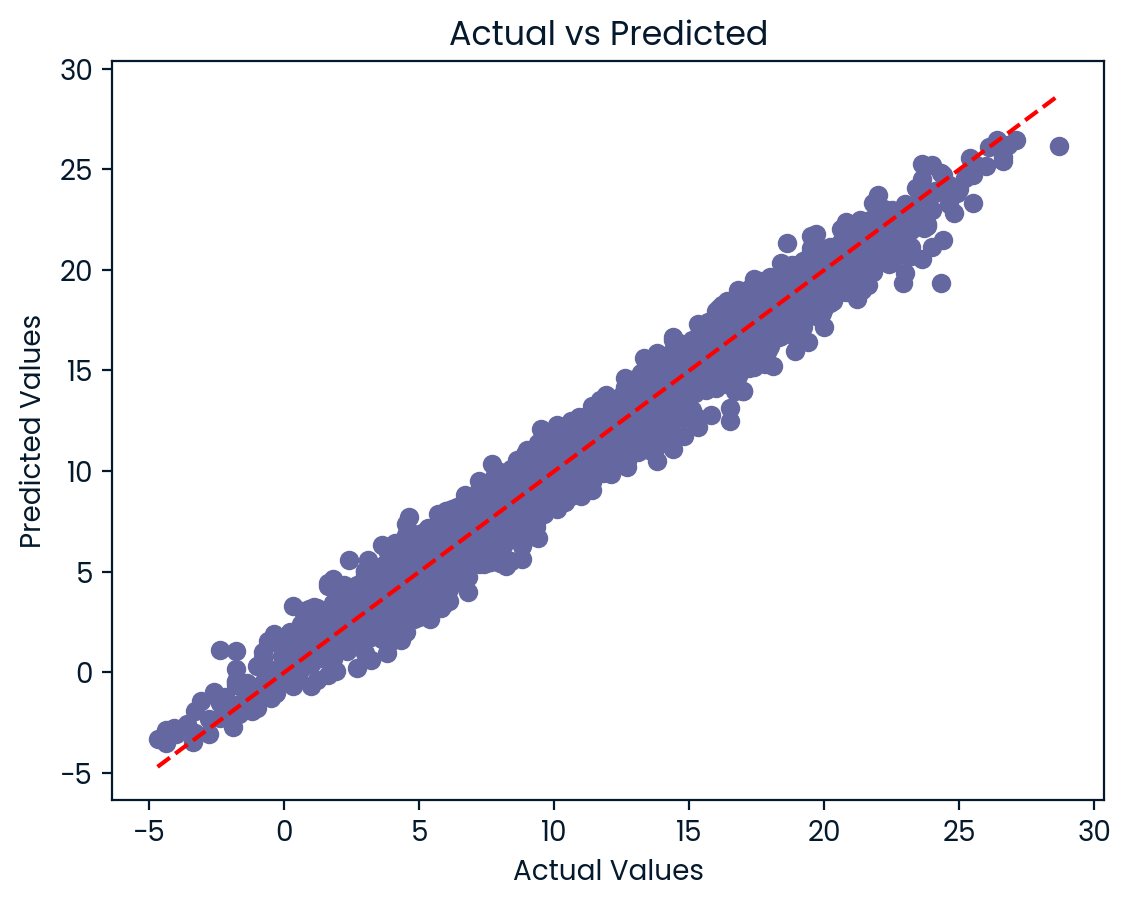

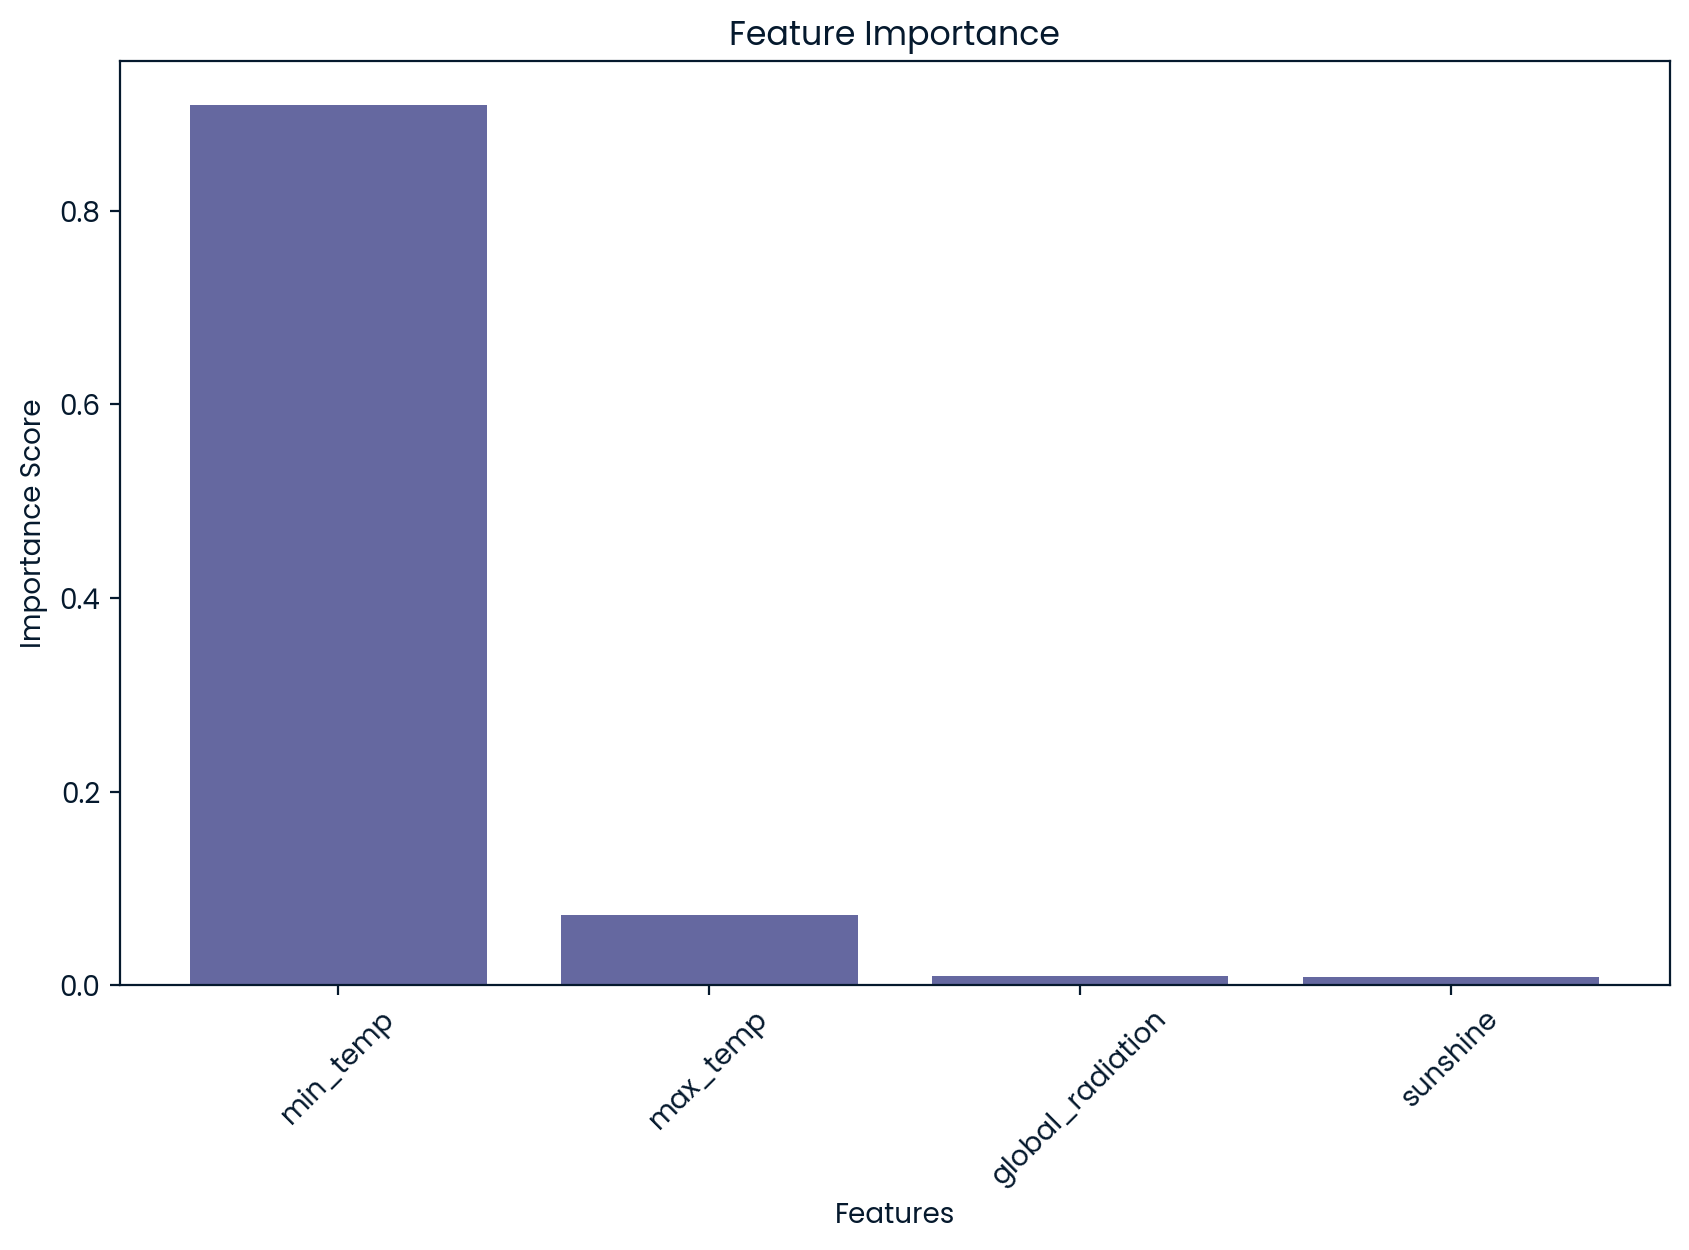

In [20]:
### RANDOM FOREST

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Split the data into train and test sets
weather3 = weather.dropna()
weather3 = weather3[['min_temp', 'max_temp', 'global_radiation', 'sunshine', 'mean_temp']]
X = weather3.drop('mean_temp', axis=1)  # Features
y = weather3['mean_temp']  # Target variable


# Ensure all features are numeric and handle datetime if present
X = X.apply(pd.to_numeric, errors='coerce')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)


# 2. Set up the Random Forest model and perform Grid Search with cross-validation
rf = RandomForestRegressor(random_state=7)


# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [150],         # Number of trees
    'max_depth': [10],        # Maximum depth of each tree
    'min_samples_split': [20],        # Minimum samples required to split a node
}

# Perform Grid Search with cross-validation (5-fold CV)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


# 3. Output the best hyperparameters
best_rf = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")


# 4. Train the model with the best hyperparameters on the entire train dataset
best_rf.fit(X_train, y_train)


# 5. Predict on the test set
y_pred = best_rf.predict(X_test)


# 6. Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on test set: {rmse}")


# 7. Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# 8. Plot Feature Importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort the importances

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

Best Hyperparameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
RMSE on test set: 1.024089959838267


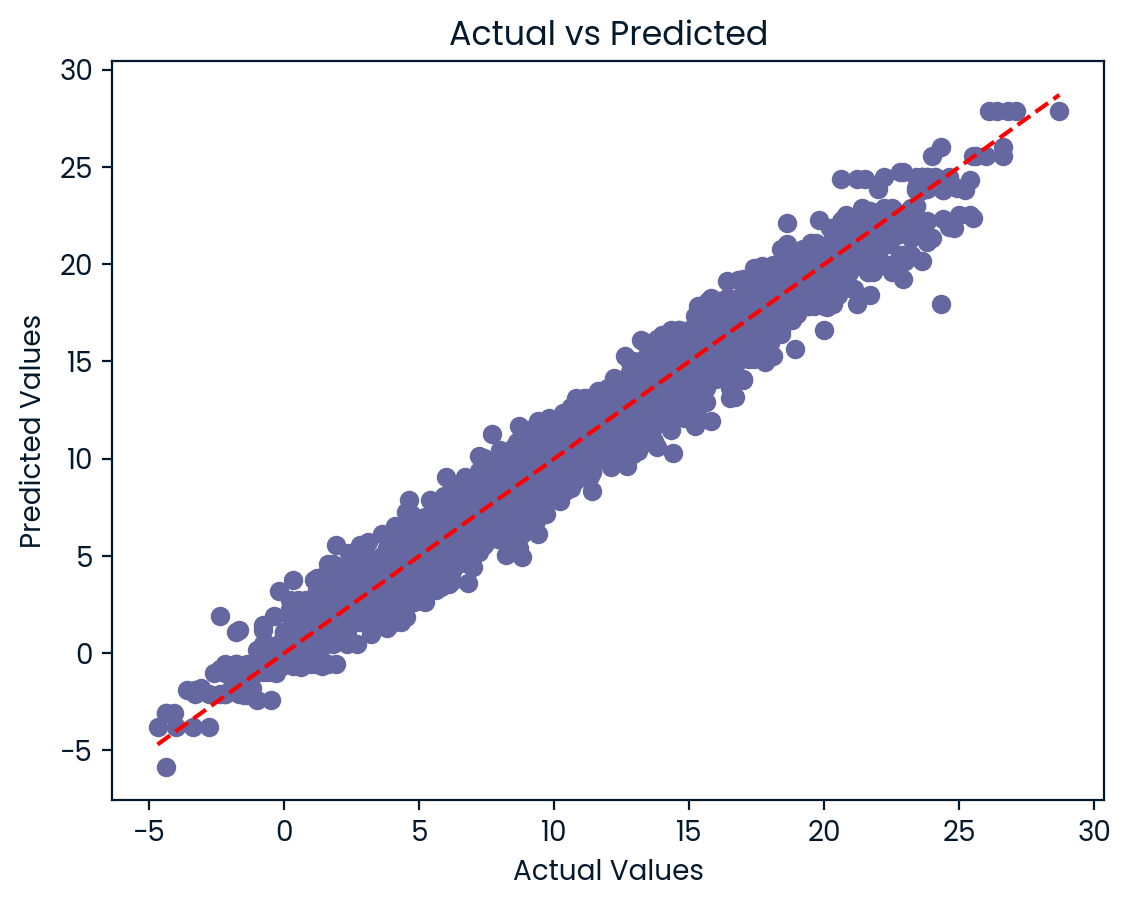

In [21]:
### Decision Trees


# 1. Split the data into train and test sets
weather4 = weather.dropna()
X = weather4.drop('mean_temp', axis=1)  # Features
y = weather4['mean_temp']  # Target variable


# Ensure all features are numeric and handle datetime if present
X = X.apply(pd.to_numeric, errors='coerce')
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X, y, test_size=0.3, random_state=7)


# 2. Set up the Random Forest model and perform Grid Search with cross-validation
dt = DecisionTreeRegressor(random_state=7)


# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [10],               # Maximum depth of the tree
    'min_samples_split': [10],              # Minimum samples required to split a node
    'min_samples_leaf': [4],                # Minimum samples required in a leaf node
    'max_features': [None] # Number of features to consider at each split
}

# Perform Grid Search with cross-validation (5-fold CV)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_dt_train, y_dt_train)


# 3. Output the best hyperparameters
best_dt = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")


# 4. Train the model with the best hyperparameters on the entire train dataset
best_dt.fit(X_dt_train, y_dt_train)


# 5. Predict on the test set
y_dt_pred = best_dt.predict(X_dt_test)


# 6. Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_dt_test, y_dt_pred))
print(f"RMSE on test set: {rmse}")


# 7. Plot the actual vs predicted values
plt.scatter(y_dt_test, y_dt_pred)
plt.plot([min(y_dt_test), max(y_dt_test)], [min(y_test), max(y_dt_test)], 'r--')  # Diagonal line
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [22]:
weather4 = weather.dropna()
X = weather4.drop('mean_temp', axis=1)  # Features
y = weather4['mean_temp']  # Target variable

X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X, y, test_size=0.3, random_state=7)
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X, y, test_size=0.3, random_state=7)
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X, y, test_size=0.3, random_state=7)

# MLflow setup
mlflow.set_experiment("model_comparison_experiment")

# Define a function to log model runs in MLflow
def log_model_run(model_name, model, X_train, X_test, y_train, y_test):
    with mlflow.start_run(run_name=model_name):
        # Train the model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"{model_name} RMSE: {rmse}")

        # Log RMSE and model
        mlflow.log_metric("rmse", rmse)
        mlflow.sklearn.log_model(model, model_name)

        # Log the model parameters
        if hasattr(model, 'get_params'):
            params = model.get_params()
            mlflow.log_params(params)

        # Optional: Log actual vs predicted values as an artifact
        plt.scatter(y_test, y_pred)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'{model_name} Actual vs Predicted')
        plt.savefig(f'{model_name}_actual_vs_predicted.png')
        plt.close()
        mlflow.log_artifact(f'{model_name}_actual_vs_predicted.png')

# Linear Regression Model
lr_model = LinearRegression()
log_model_run("Linear Regression", lr_model, X_lr_train, X_lr_test, y_lr_train, y_lr_test)

# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
log_model_run("Decision Tree", dt_model, X_dt_train, X_dt_test, y_dt_train, y_dt_test)

# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [150],
    'max_depth': [10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
log_model_run("Random Forest", grid_search_rf, X_rf_train, X_rf_test, y_rf_train, y_rf_test)

# 2. Retrieve experiment results from MLflow
experiment_id = mlflow.get_experiment_by_name("model_comparison_experiment").experiment_id
experiment_results = mlflow.search_runs(experiment_ids=experiment_id)

# 3. Find the best model based on RMSE
best_run = experiment_results.loc[experiment_results['metrics.rmse'].idxmin()]
print(f"Best Model: {best_run['tags.mlflow.runName']} with RMSE: {best_run['metrics.rmse']}")

Linear Regression RMSE: 0.902468347400102
Decision Tree RMSE: 1.2644046022988336
Random Forest RMSE: 0.8807439049467556
Best Model: Random Forest with RMSE: 0.8807439049467556
